# Perform clustering (hierarchical,K means clustering ) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.



In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

# hierarchical clustering

In [2]:
import pandas as pd

# Use double backslashes
df = pd.read_excel("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\Book1.xlsx")
df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Display summary statistics of numerical columns
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

<Axes: >

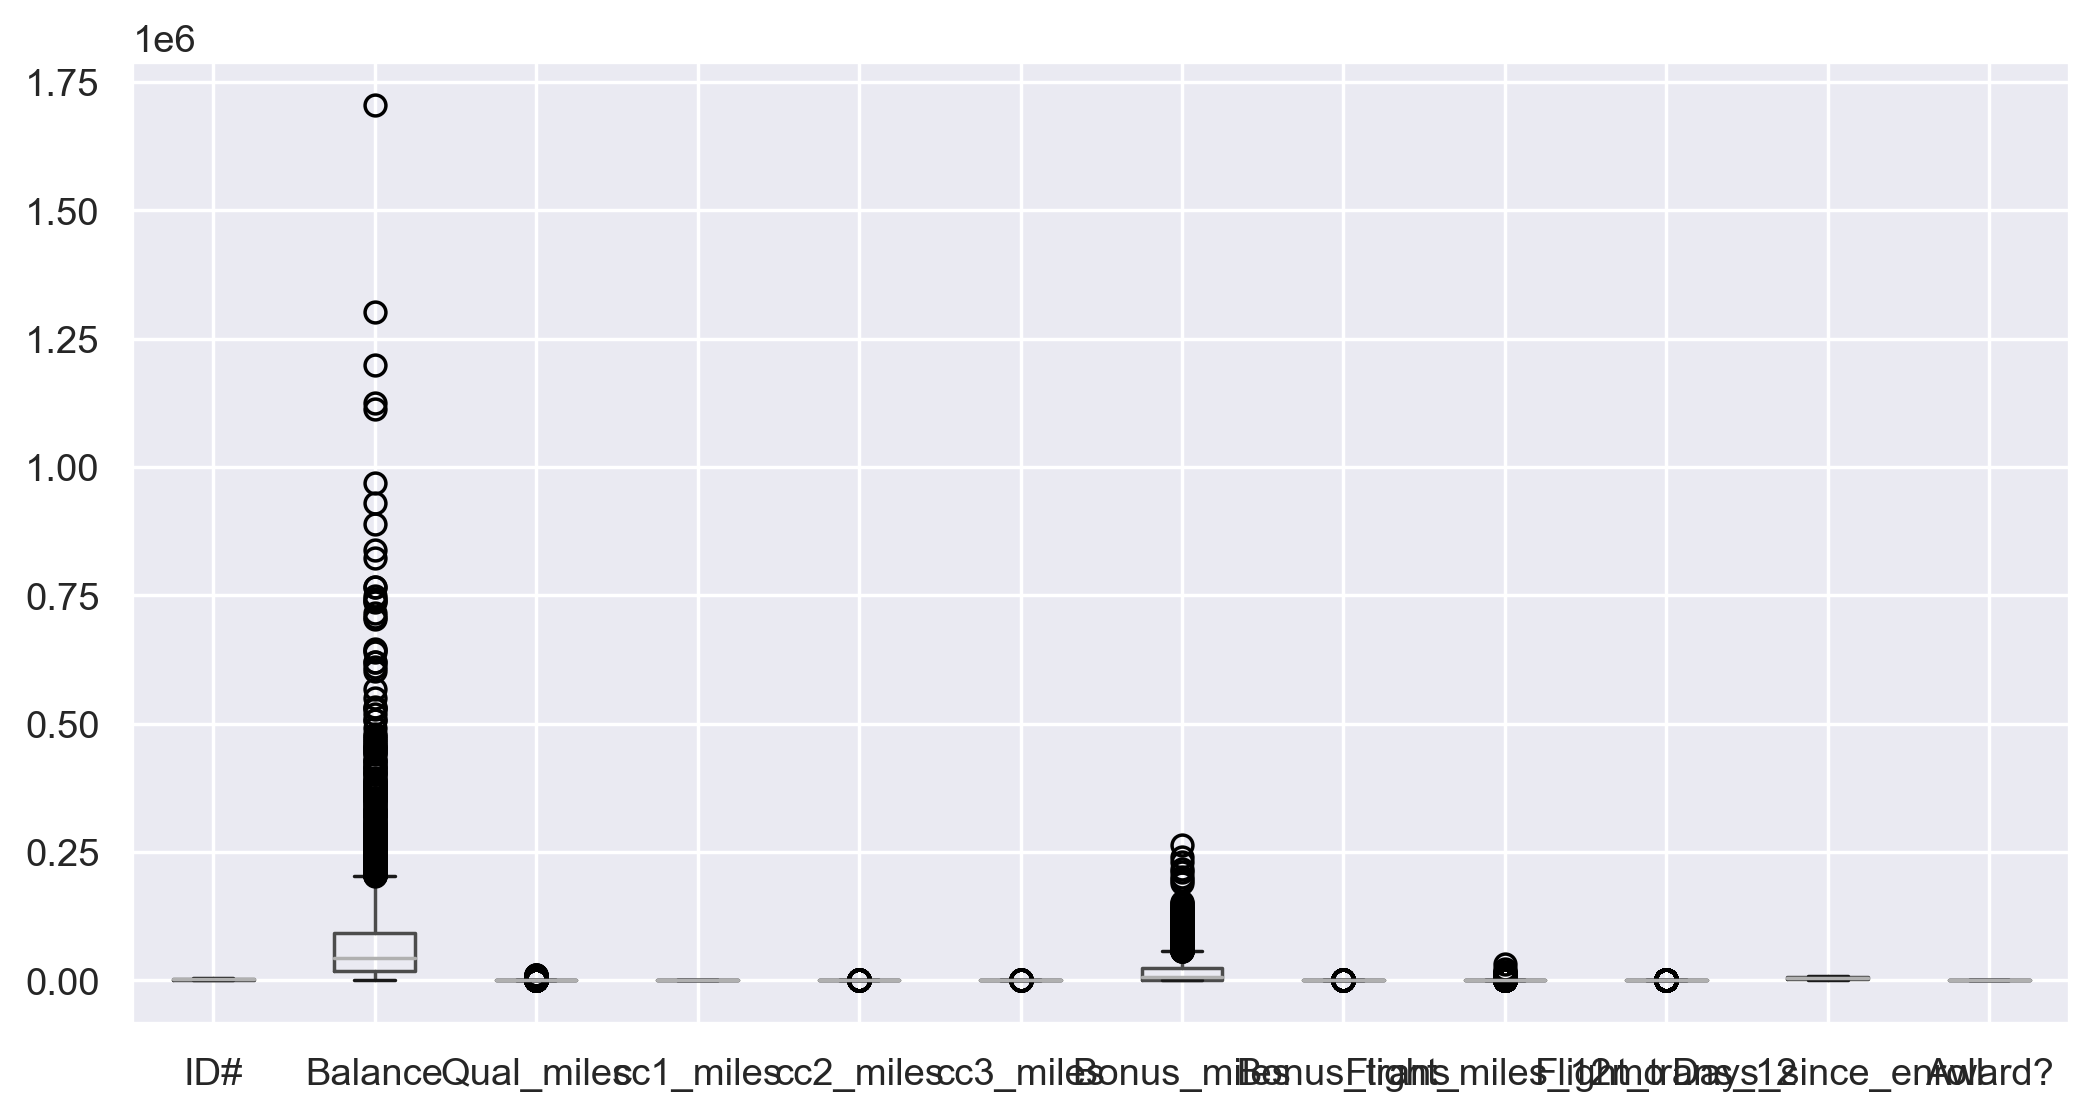

In [5]:
df.boxplot()

In [6]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [7]:
outlier_detection(df,'Balance')

(-92287.25, 203218.75)

In [8]:
df[df['Balance']>203218.75]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0
32,33,276571,0,4,1,1,42044,23,0,0,7872,0
43,44,619393,0,3,1,1,15008,14,0,0,7819,1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3777,221543,0,1,1,1,10300,5,200,3,3554,1
3756,3779,203353,0,1,1,1,14000,13,4000,8,3557,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1


In [9]:
df.loc[df['Balance']>203218.75,'Balance'] =203218.75

In [10]:
outlier_detection(df,'Qual_miles')

(0.0, 0.0)

In [11]:
df[df['Qual_miles']>0.0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
21,22,185681.00,2024,1,1,1,13300,16,1800,9,6896,1
24,25,203218.75,500,1,1,1,4025,21,700,4,7932,0
45,46,203218.75,967,1,1,1,23600,14,2000,4,6884,1
70,72,84409.00,5031,2,1,1,15436,16,1150,4,7766,0
100,103,25076.00,1182,5,1,1,57203,14,0,0,6750,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,3925,13004.00,1000,1,1,1,13890,39,0,0,1572,1
3911,3934,55922.00,2273,1,1,1,8104,19,4104,16,1552,0
3953,3976,59927.00,739,1,1,1,3100,3,0,0,1464,1
3956,3979,47301.00,1005,1,1,1,4561,4,0,0,1464,0


In [12]:
df.loc[df['Qual_miles']>0.0,'Qual_miles'] =0.0

In [13]:
outlier_detection(df,'cc2_miles')

(1.0, 1.0)

In [14]:
df[df['Qual_miles']<1.0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0,1,1,1,174,1,0,0,7000,0
1,2,19244.0,0,1,1,1,215,2,0,0,6968,0
2,3,41354.0,0,1,1,1,4123,4,0,0,7034,0
3,4,14776.0,0,1,1,1,500,1,0,0,6952,0
4,5,97752.0,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385.0,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597.0,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899.0,0,1,1,1,500,1,500,1,1401,0


In [15]:
df.loc[df['Qual_miles']<1.0,'Qual_miles'] =1.0

In [16]:
outlier_detection(df,'Bonus_miles')

(-32575.75, 57626.25)

In [17]:
df[df['Bonus_miles']>57626.25]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
11,12,96522.0,1,5,1,1,61105,19,0,0,6924,1
20,21,120576.0,1,5,1,1,58831,23,250,2,6896,1
79,82,38896.0,1,5,1,1,76988,16,556,1,7771,1
85,88,35418.0,1,5,1,1,58557,18,900,3,6813,1
94,97,185549.0,1,5,1,1,110859,39,2950,16,6778,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3822,3845,166638.0,1,5,1,1,64572,22,0,0,1697,0
3846,3869,97510.0,1,5,1,1,71609,51,7650,26,1665,1
3855,3878,190730.0,1,5,1,1,78916,28,2450,9,1648,1
3883,3906,126167.0,1,5,1,1,190160,15,0,0,1612,1


In [18]:
df.loc[df['Bonus_miles']>57626.25,'Bonus_miles'] =57626.25

In [19]:
outlier_detection(df,'Bonus_trans')

(-18.0, 38.0)

In [20]:
df[df['Bonus_trans']>38.0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,9,203218.75,1,3,2,1,1753.00,43,3850,12,6948,1
65,66,53914.00,1,3,1,1,33767.00,45,5550,29,6826,1
94,97,185549.00,1,5,1,1,57626.25,39,2950,16,6778,1
121,124,203218.75,1,5,1,1,57626.25,45,2250,10,7668,1
127,130,203218.75,1,4,1,1,56308.00,41,5200,14,7645,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3594,3617,27619.00,1,4,1,1,57626.25,68,14050,46,1325,1
3837,3860,8150.00,1,1,2,1,14135.00,41,500,2,1676,1
3846,3869,97510.00,1,5,1,1,57626.25,51,7650,26,1665,1
3902,3925,13004.00,1,1,1,1,13890.00,39,0,0,1572,1


In [21]:
df.loc[df['Bonus_trans']>38.0,'Bonus_trans'] =38.0

In [22]:
df[df['Flight_miles_12mo']>777.5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
4,5,97752.00,1,4,1,1,43300.0,26,2077,4,6935,1
8,9,203218.75,1,3,2,1,1753.0,38,3850,12,6948,1
9,10,104860.00,1,3,1,1,28426.0,28,1150,3,6931,1
21,22,185681.00,1,1,1,1,13300.0,16,1800,9,6896,1
22,23,20584.00,1,1,1,1,3450.0,11,3450,11,6884,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,3957,76595.00,1,1,1,1,10577.0,2,9577,1,1515,0
3946,3969,139032.00,1,3,1,1,19565.0,17,1150,4,1481,0
3950,3973,59650.00,1,1,1,1,5050.0,16,3950,13,1476,0
3967,3990,26504.00,1,2,1,1,10599.0,29,1000,7,1445,0


In [23]:
df.loc[df['Flight_miles_12mo']>777.5,'Flight_miles_12mo'] =777.5

In [24]:
outlier_detection(df,'cc3_miles')

(1.0, 1.0)

In [25]:
df[df['cc3_miles']>1.0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
106,109,96627.00,1,1,1,3,49059.00,26,777.5,9,6738,1
343,348,112501.00,1,1,1,2,19140.00,11,0.0,0,7101,0
384,389,28193.00,1,5,1,4,57626.25,32,0.0,0,6980,1
850,861,25629.00,1,4,1,5,57626.25,36,600.0,2,5966,1
904,915,15835.00,1,2,1,5,57626.25,16,0.0,0,5825,1
1036,1047,154664.00,1,4,1,3,57626.25,33,0.0,0,5769,0
1244,1257,166465.00,1,4,1,4,57626.25,30,0.0,0,5531,0
1300,1313,203218.75,1,3,1,4,43993.00,38,777.5,7,5030,0
1878,1895,128302.00,1,5,1,4,57626.25,32,400.0,2,4103,1
1917,1934,82981.00,1,5,1,3,57626.25,38,777.5,2,3964,1


In [26]:
df.loc[df['cc3_miles']>1.0,'cc3_miles'] =1.0

<Axes: >

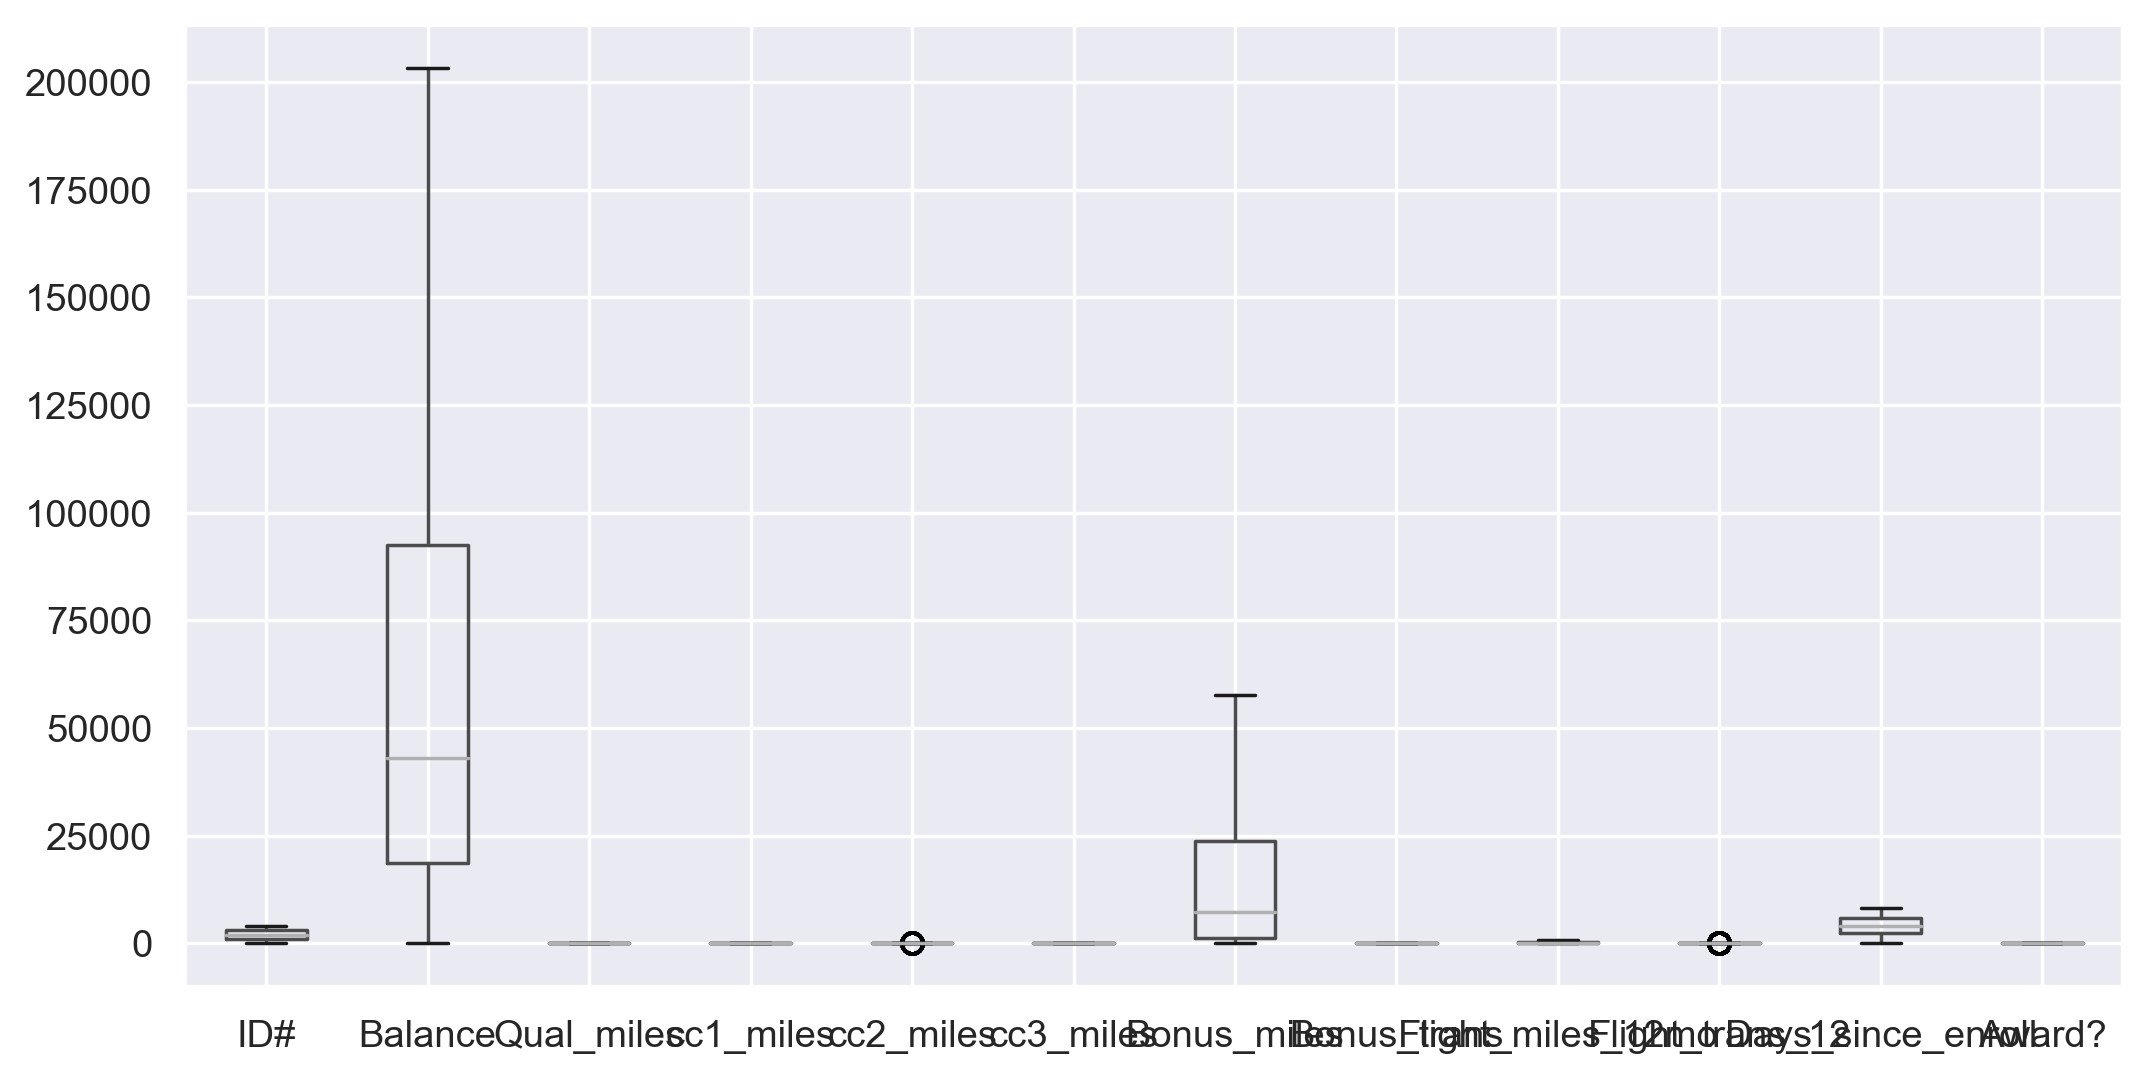

In [27]:
df.boxplot()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73512503, -0.60725829,  0.        , ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.36216787,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [30]:
from scipy.cluster import hierarchy

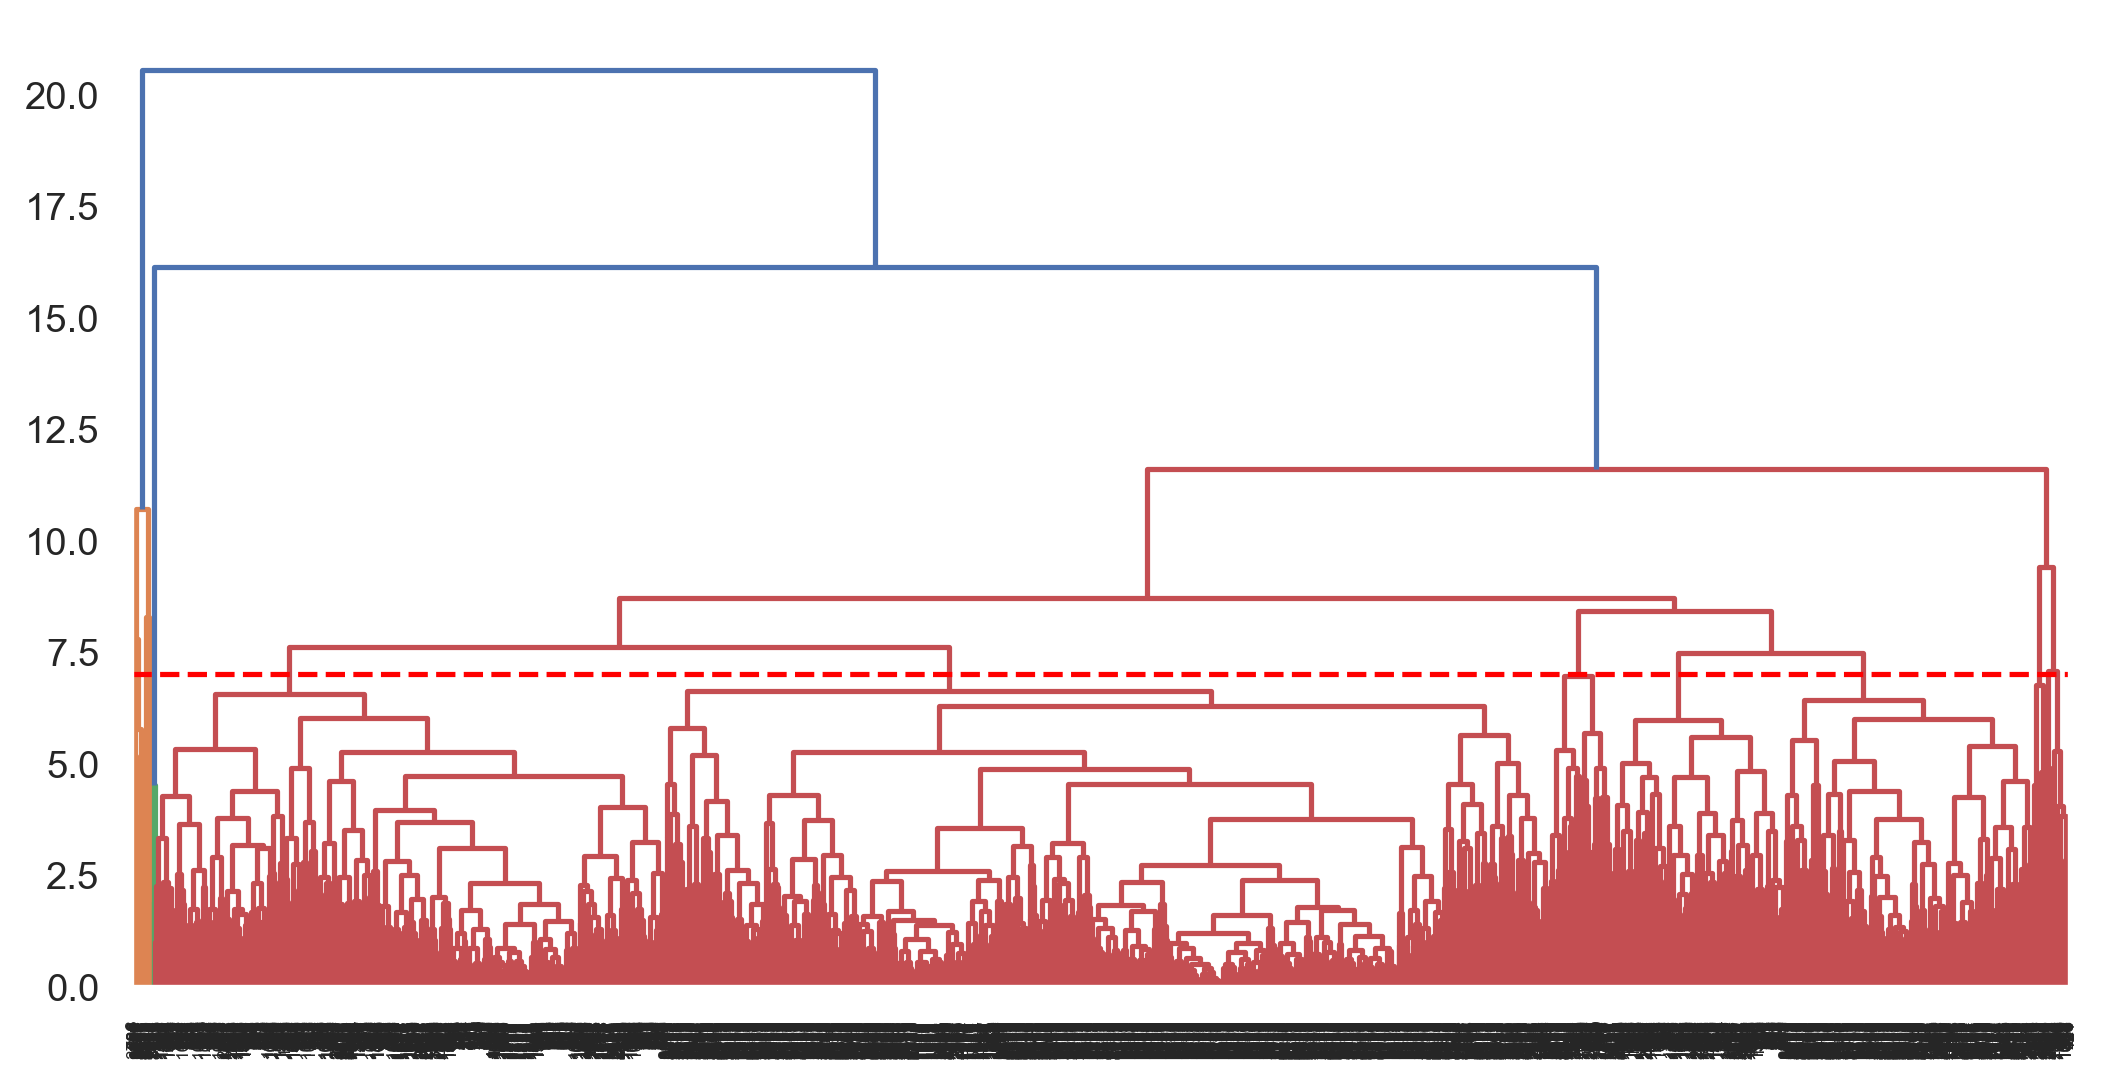

In [31]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

In [32]:
#Model Building

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,1,1,1,1,174.0,1,0.0,0,7000,0
1,2,19244.0,1,1,1,1,215.0,2,0.0,0,6968,0
2,3,41354.0,1,1,1,1,4123.0,4,0.0,0,7034,0
3,4,14776.0,1,1,1,1,500.0,1,0.0,0,6952,0
4,5,97752.0,1,4,1,1,43300.0,26,777.5,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,1,1,1,8525.0,4,200.0,1,1403,1
3995,4018,64385.0,1,1,1,1,981.0,5,0.0,0,1395,1
3996,4019,73597.0,1,3,1,1,25447.0,8,0.0,0,1402,1
3997,4020,54899.0,1,1,1,1,500.0,1,500.0,1,1401,0


In [36]:
df['cluster'] = ypred
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,1,1,1,1,174.0,1,0.0,0,7000,0,0
1,2,19244.0,1,1,1,1,215.0,2,0.0,0,6968,0,0
2,3,41354.0,1,1,1,1,4123.0,4,0.0,0,7034,0,0
3,4,14776.0,1,1,1,1,500.0,1,0.0,0,6952,0,0
4,5,97752.0,1,4,1,1,43300.0,26,777.5,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,1,1,1,1,8525.0,4,200.0,1,1403,1,0
3995,4018,64385.0,1,1,1,1,981.0,5,0.0,0,1395,1,0
3996,4019,73597.0,1,3,1,1,25447.0,8,0.0,0,1402,1,0
3997,4020,54899.0,1,1,1,1,500.0,1,500.0,1,1401,0,0


In [37]:
df[df['cluster']==0].mean()

ID#                   2302.594551
Balance              37384.058193
Qual_miles               1.000000
cc1_miles                1.448718
cc2_miles                1.023237
cc3_miles                1.000000
Bonus_miles           6582.100361
Bonus_trans              8.077324
Flight_miles_12mo       58.766226
Flight_trans_12          0.296875
Days_since_enroll     3597.657051
Award?                   0.260016
cluster                  0.000000
dtype: float64

In [38]:
df[df['cluster'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,5,97752.0,1,4,1,1,43300.00,26,777.5,4,6935,1,1
6,7,84914.0,1,3,1,1,27482.00,25,0.0,0,6994,0,1
7,8,20856.0,1,1,1,1,5250.00,4,250.0,1,6938,1,1
9,10,104860.0,1,3,1,1,28426.00,28,777.5,3,6931,1,1
11,12,96522.0,1,5,1,1,57626.25,19,0.0,0,6924,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,3984,131125.0,1,1,1,1,4993.00,11,50.0,1,1443,0,1
3966,3989,91605.0,1,4,1,1,37840.00,18,0.0,0,1444,0,1
3967,3990,26504.0,1,2,1,1,10599.00,29,777.5,7,1445,0,1
3979,4002,57793.0,1,3,1,1,20959.00,15,777.5,3,1424,1,1


In [39]:
#Analyzing the clusters

In [40]:
df.groupby('cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
0,2302.594551,37384.058193,1.0,1.448718,1.023237,1.0,6582.100361,8.077324,58.766226,0.296875,3597.657051,0.260016
1,1536.917498,107584.940286,1.0,3.073852,1.000000,1.0,30072.248503,17.105788,376.157019,3.161677,4983.610778,0.553560


In [41]:
# 4 clusters

In [42]:
hc = AgglomerativeClustering(n_clusters=4)
yp = hc.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
df = pd.read_excel("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\Book1.xlsx")
df['Cluster'] = yp
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [44]:
df.groupby('Cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
0,2303.176926,37805.783123,98.718712,1.454138,1.000000,1.003261,6455.696698,7.935589,87.235630,0.263351,3591.148797,0.257644
1,1415.705882,109553.023109,359.936975,1.487395,1.000000,1.004202,14173.451681,14.878151,2451.317227,7.380252,5175.399160,0.544118
2,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,1593.097371,142634.071081,157.572541,3.809153,1.000000,1.037975,44155.978578,18.592016,422.486855,1.206426,4894.719572,0.557936


In [45]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=3999, centers=4, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.7874


# k means clustering 

In [48]:
df = pd.read_excel("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\Book1.xlsx")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [49]:
df.drop(columns=['ID#'], inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [50]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [51]:
#Model Building
from sklearn.cluster import KMeans

In [52]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([2, 2, 2, ..., 4, 0, 0])

In [54]:
len(yp)

3999

In [55]:
#cluster centre
km.cluster_centers_

array([[-0.38775525, -0.144346  , -0.58814683, -0.09824189, -0.06276658,
        -0.52830733, -0.52133666, -0.22168925, -0.24380173, -0.97522211,
        -0.7669193 ],
       [ 1.24396101,  0.53016896,  0.25203552, -0.09824189, -0.06276658,
         0.82768261,  1.90240145,  4.04732387,  4.29804926,  0.30654091,
         0.93352447],
       [-0.13841499, -0.14371788, -0.40452955, -0.09824189, -0.05748018,
        -0.44928422, -0.32189839, -0.2029053 , -0.22176446,  0.73862147,
        -0.7669193 ],
       [ 0.64278782, -0.10624666,  1.5556267 , -0.09824189, -0.05027262,
         1.36988578,  0.87037337, -0.05079643, -0.0509151 ,  0.40607186,
         0.53871846],
       [-0.15315114, -0.05836641, -0.26472047, -0.09824189, -0.06276658,
        -0.27167216, -0.10356488, -0.02745803, -0.02070602,  0.06588497,
         1.30391816],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [56]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [57]:
#Visualize the clusters
x[:,0]

array([-4.51140783e-01, -5.39456874e-01, -3.20031232e-01, ...,
       -4.29480975e-05, -1.85606976e-01, -7.00507951e-01])

In [58]:
x[:,1]

array([-0.18629869, -0.18629869, -0.18629869, ..., -0.18629869,
       -0.18629869, -0.18629869])

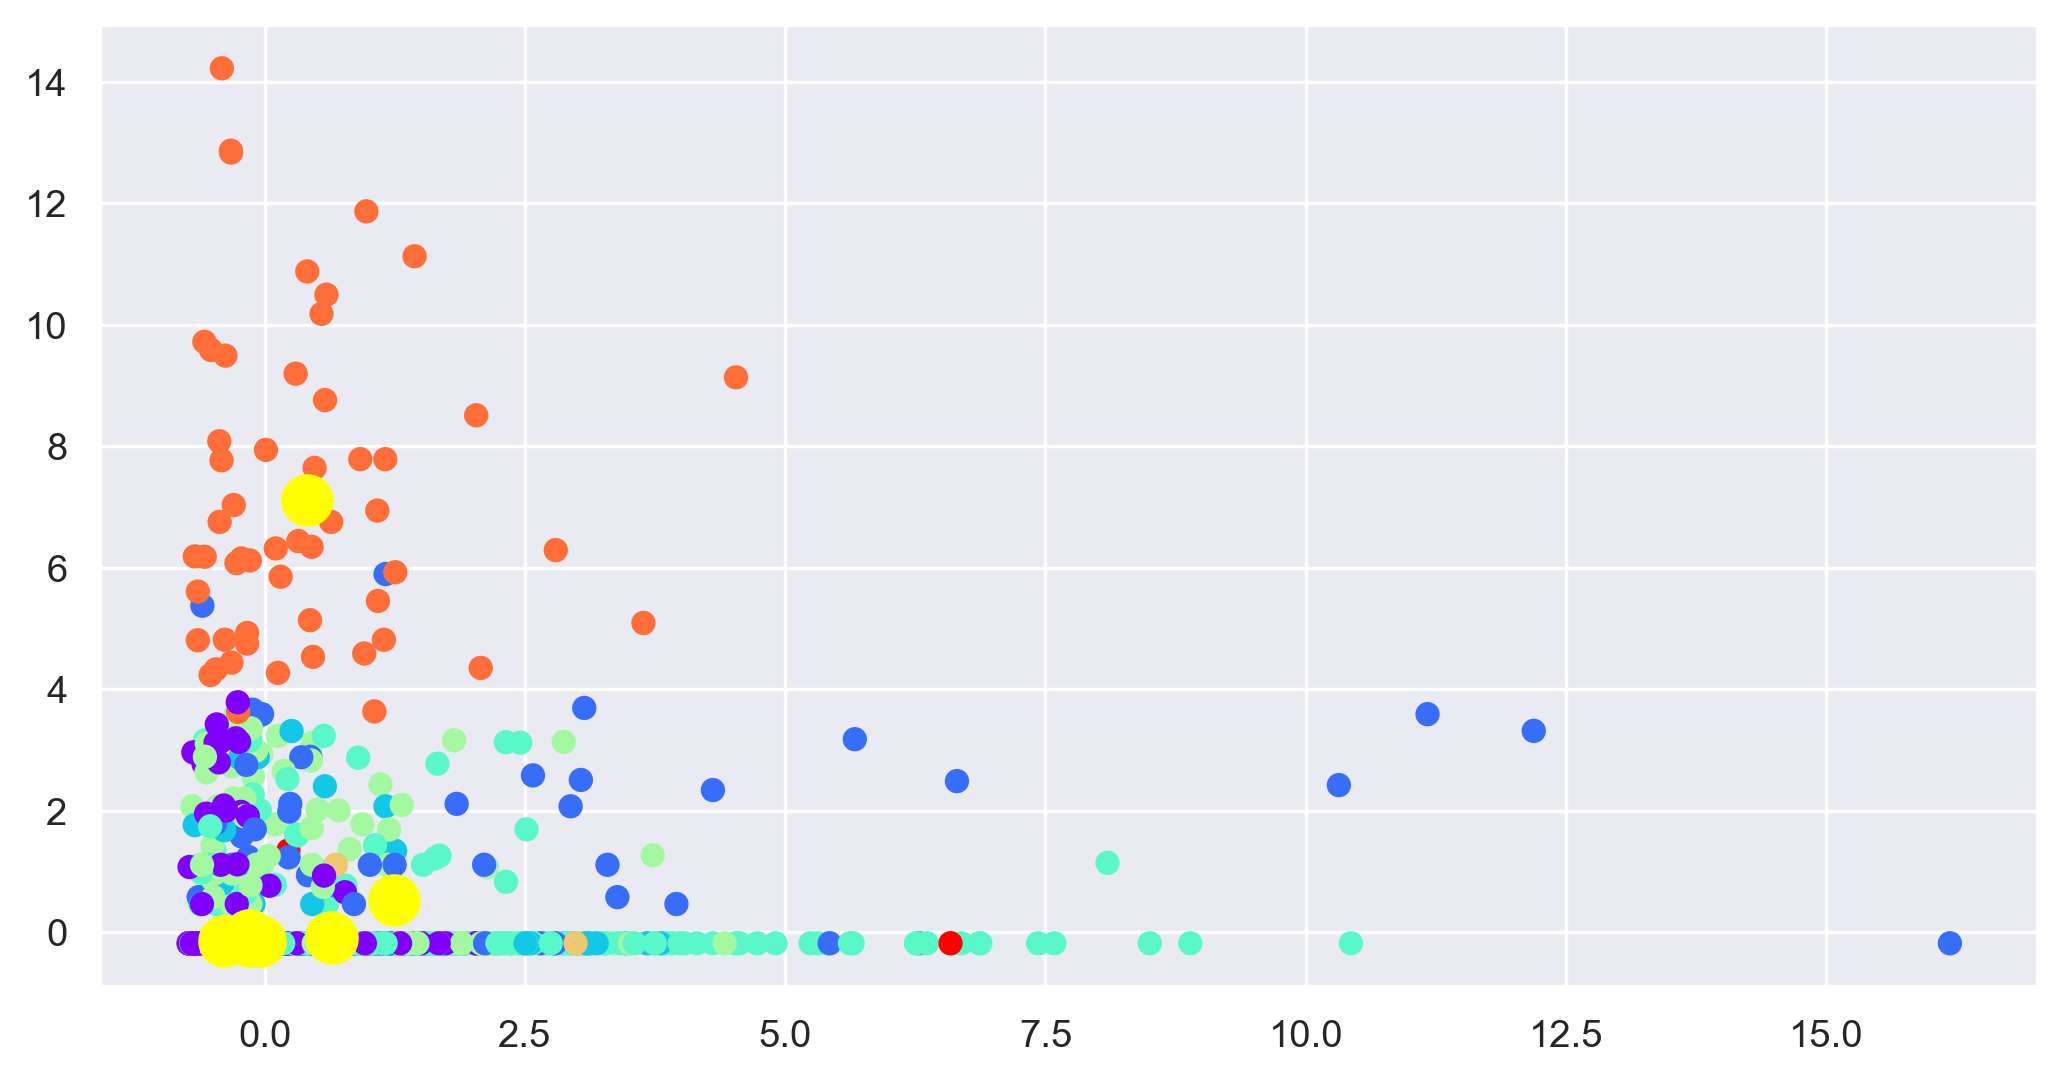

In [62]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 200)

In [63]:
km.inertia_

17316.683045718422

In [276]:
#Elbow graph

In [64]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [65]:
wcss

[43988.999999999985,
 35409.5166298613,
 30899.271221785566,
 27153.75222832097,
 24883.808921585536,
 22087.83709802757,
 18891.79444085059,
 17316.75578215064,
 16043.22807765863,
 14726.983322766795]

Text(0.5, 1.0, 'Elbow Graph')

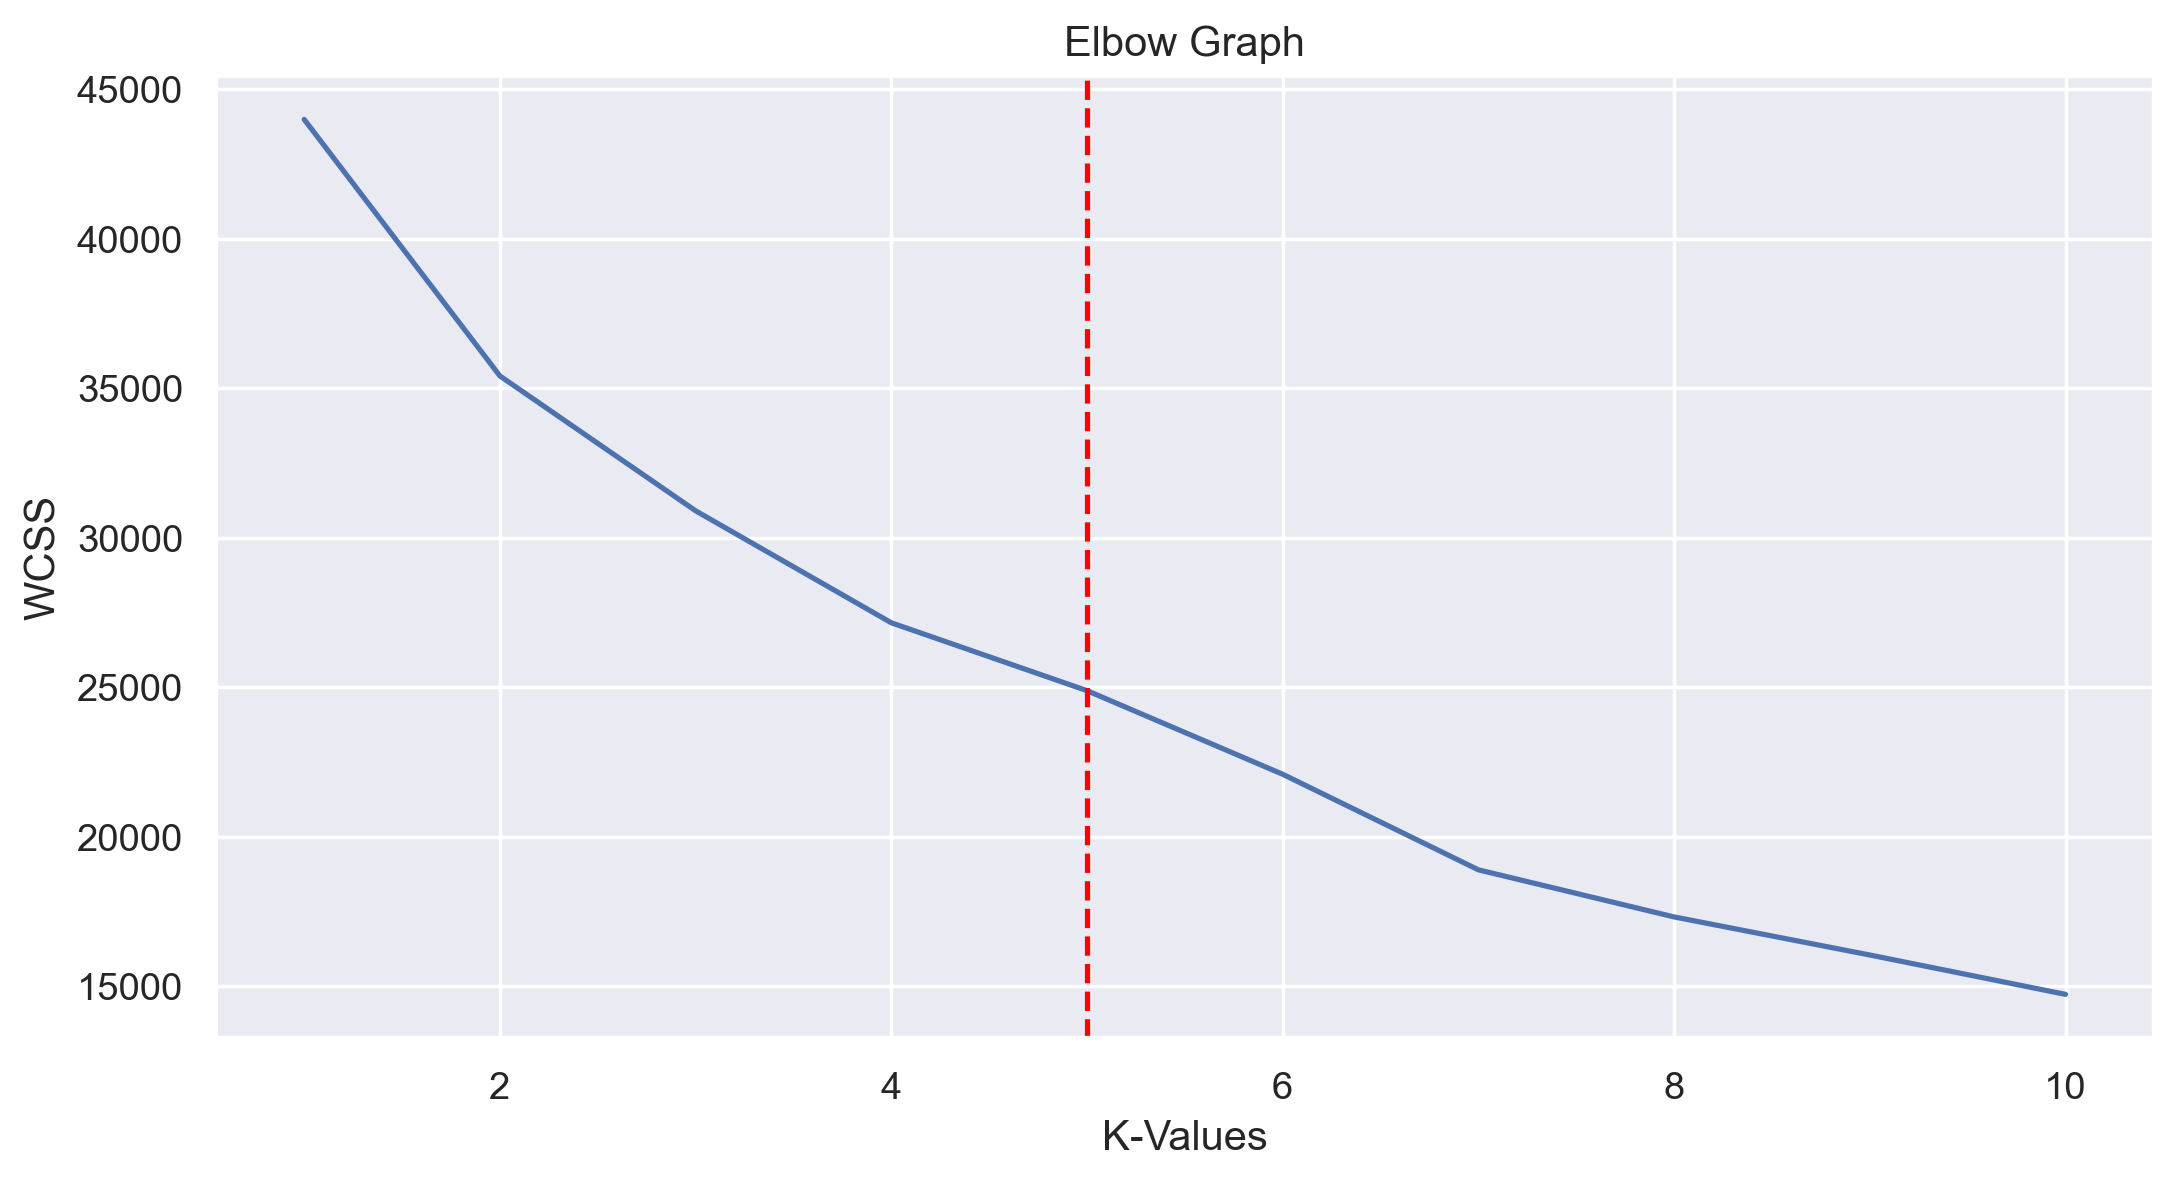

In [66]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [67]:
#final model

In [68]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 3, 1, 1])

In [69]:
#Visualize the clusters
km.cluster_centers_

array([[ 1.15027150e+00,  1.04878830e+00,  9.94472314e-02,
        -9.82418871e-02, -6.27665798e-02,  5.81430365e-01,
         1.52418931e+00,  3.46085804e+00,  3.68382726e+00,
         2.73681855e-01,  8.97146516e-01],
       [-2.97638376e-01, -6.25518575e-02, -6.10462133e-01,
        -9.82418871e-02, -6.07151095e-02, -5.21734906e-01,
        -5.01922099e-01, -1.87124067e-01, -1.99766564e-01,
        -2.09857758e-01, -3.52254209e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02,  5.17838824e-02],
       [ 4.25061034e-01, -9.41992329e-03,  1.19202141e+00,
        -9.82418871e-02, -5.47375493e-02,  9.10476488e-01,
         7.40555542e-01, -9.28208224e-02, -1.02222737e-01,
         3.74258725e-01,  5.65492577e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
  

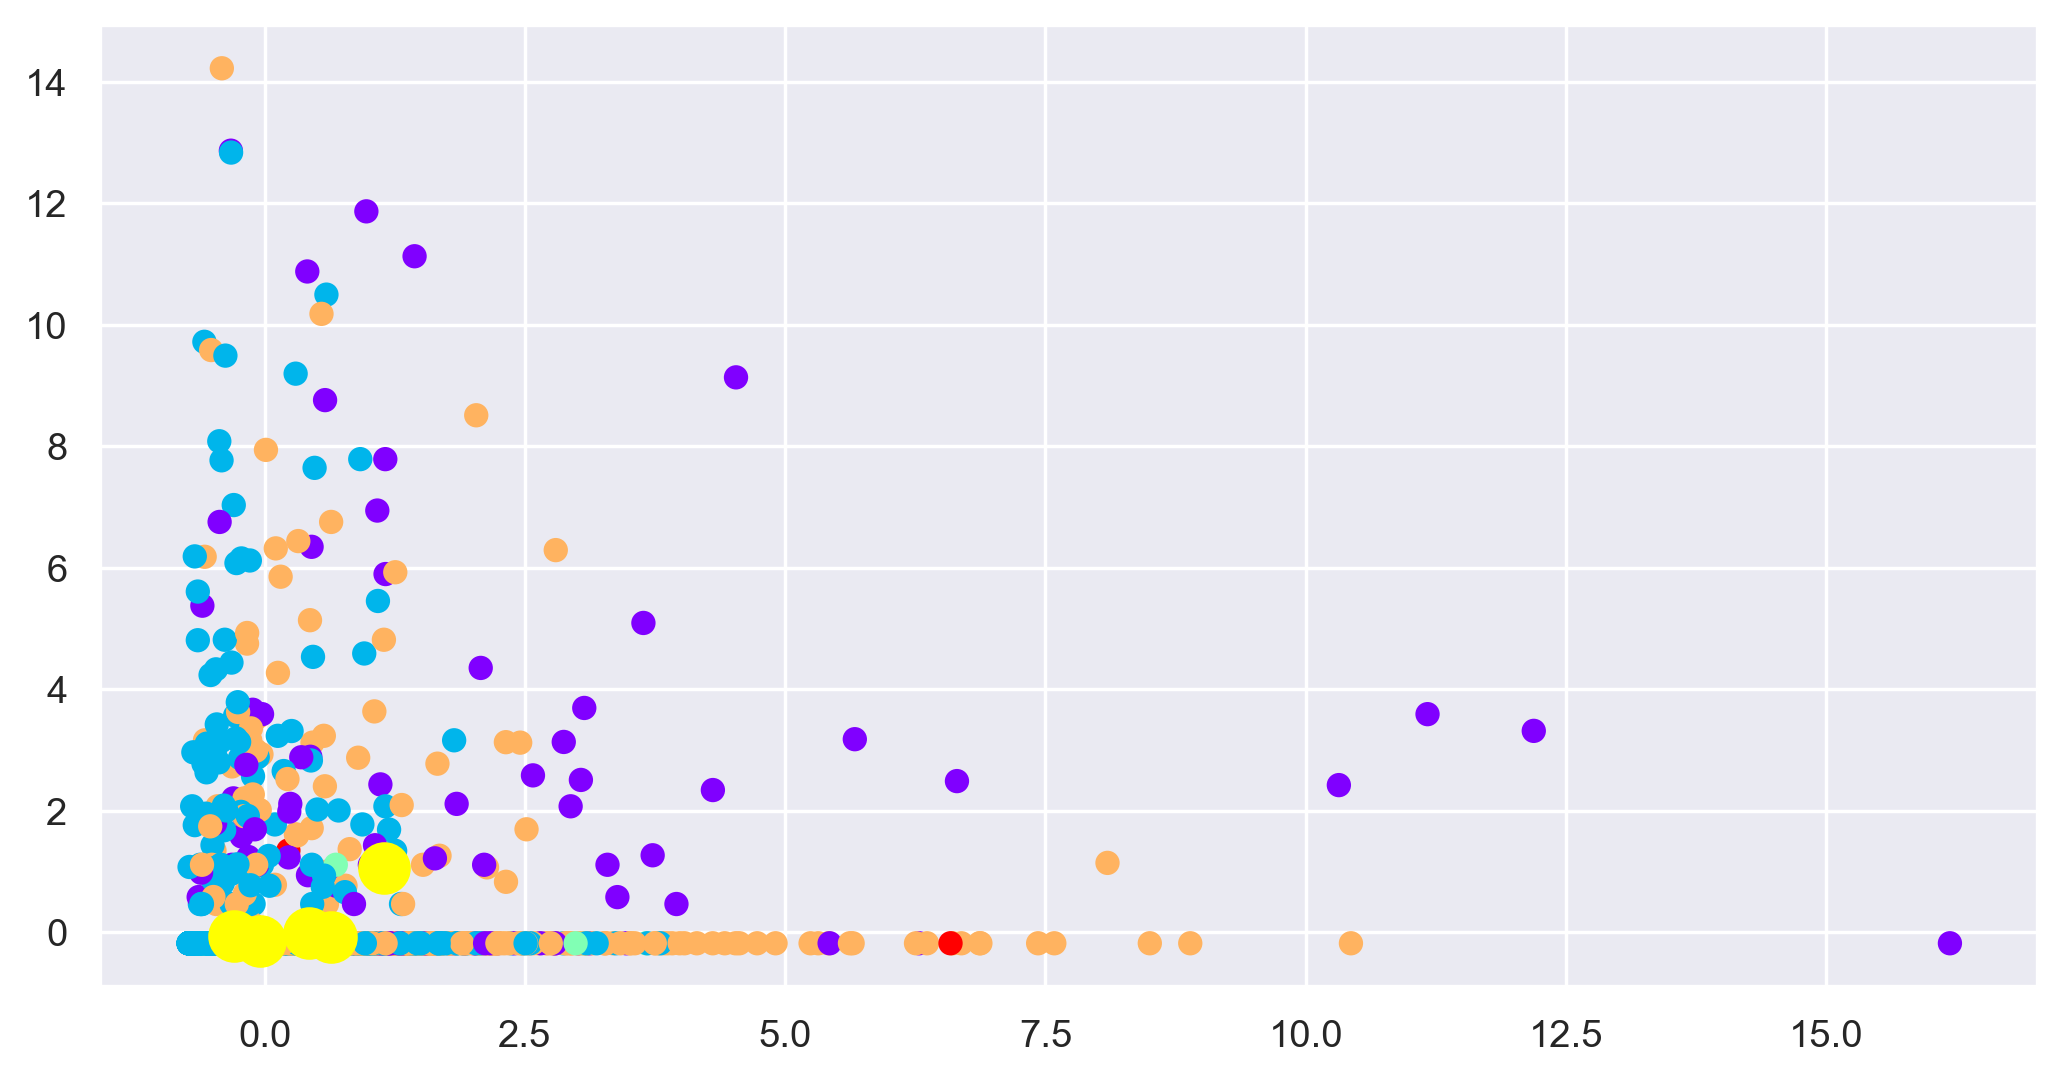

In [71]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

In [284]:
#Analyzing clusters
df['cluster'] = ypred
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
df[df['Cluster'] == 0].mean()
df[df['Cluster'] == 1].mean()

In [ ]:
df.groupby('cluster').agg('mean')

In [ ]:
df['cluster'].value_counts()

In [81]:
from sklearn.metrics import adjusted_mutual_info_score


# Calculate Adjusted Mutual Information
ami = adjusted_mutual_info_score(yp, yp)

# Print the result
print(f'Adjusted Mutual Information: {ami:.4f}')


Adjusted Mutual Information: 1.0000


In [82]:
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(yp, yp)

# Print the result
print(f'Adjusted Rand Index: {ari:.4f}')


Adjusted Rand Index: 1.0000


In [83]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Calculate homogeneity, completeness, and V-measure
homogeneity = homogeneity_score(yp, yp)
completeness = completeness_score(yp, yp)
v_measure = v_measure_score(yp, yp)

# Print the results
print(f'Homogeneity: {homogeneity:.4f}')
print(f'Completeness: {completeness:.4f}')
print(f'V-measure: {v_measure:.4f}')


Homogeneity: 1.0000
Completeness: 1.0000
V-measure: 1.0000


In [84]:
from sklearn.metrics import fowlkes_mallows_score

# Calculate Fowlkes-Mallows Index
fm_index = fowlkes_mallows_score(yp, yp)

# Print the result
print(f'Fowlkes-Mallows Index: {fm_index:.4f}')


Fowlkes-Mallows Index: 1.0000


In [85]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=3999, centers=5, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.6513


In [86]:
from sklearn.metrics import davies_bouldin_score


# Example data (replace these with your actual data)
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=3999, centers=3, random_state=42)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)

# Print the result
print(f'Davies-Bouldin Index: {db_index:.4f}')


Davies-Bouldin Index: 0.2231


In [87]:
from sklearn.metrics import calinski_harabasz_score

# Assuming X is your data and labels is the predicted cluster labels
# Replace X and labels with your actual data

# Example data (replace these with your actual data)
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)

# Print the result
print(f'Calinski-Harabasz Index: {ch_index:.4f}')


Calinski-Harabasz Index: 5196.2951
